# Unidad 2: Laboratorio 1

**Nombre:** Miguel Castillo

In [263]:
""" IMPORTAR LIBRERIAS """
""" crear dataframes """
import pandas as pd 
""" dividir datos """
from sklearn.model_selection import train_test_split 
""" clasificador de arbol de decision """
from sklearn.tree import DecisionTreeClassifier 
""" encontrar metricas del modelo """
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
"""mostrar graficas personalizadas"""
import seaborn as sn
""" graficar muestra de datos"""
import matplotlib.pyplot as plt
""" mostrar arbol de desicion"""
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

## 1. Analizar el dataset

In [238]:
""" importar del dataset """
df = pd.read_csv("Dataset of Diabetes .csv")

""" mostrar de los primeros diez datos """
df.head(10)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
7,421,34227,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
8,670,34229,M,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N
9,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N


In [239]:
""" encontrar tipos de datos de las columnas """ 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [240]:
""" mostrar estadisticas del dataset """
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


### Interpretacion del dataset:
En el dataset se cuenta con 1000 muestras y 14 columnas de variables o características. Se cuenta únicamente con dos columnas de características que contienen datos en forma de texto, las cuales son Gender y CLASS, mismas que son de tipo de dato "object". El resto de las caracteristicas son datos numericos. En las cuales se identifican que ocho columnas son de tipo "float" y las 4 columnas restantes son de tipo "int". <br>

Con el metodo describe() se muestran estadísticas solo de los datos numericos, donde se puede observar que todas las características presentes cuentan con la misma cantidad de 1000 muestras o registros. El promedio de cada columna varía, ya que especialmente los valores de las caracteristicas de ID, No_pation, Age y BMI pueden considerarse como atípicos, debido a que son datos que se alejan del resto de las caracteristicas. Las cuatro características mencionadas anteriormente sobresalen en el resto de las estadísticas como son: la desviación estándar, el mínimo, máximo, el primer cuartil (25%), segundo cuartil (50%), tercer cuartil (75%) y cuarto cuartil (100%).

## 2. Crear preprocesamiento y limpieza de datos

In [241]:
""" identificar datos faltantes """
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

#### 2.1 Codificar de etiquetas

In [242]:
""" encontrar valores unicos de las caracteristicas """
def valores_unicos_etiquetas(columna1, columna2):
    return display(df[columna1].unique(),df[columna2].unique())

In [243]:
""" analizar etiquetas de la columna [Gender] y [CLASS] """
valores_unicos_etiquetas('Gender','CLASS')

array(['F', 'M', 'f'], dtype=object)

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

**Nota**: En la columna Gender se identifican tres tipos de etiquetas ('F','M','f'). En cambio, en la columna CLASS existen cinco tipos de etiquetas de las cuales cuatro ('N','N ','Y','Y ') son similares visualmente, pero diferentes en su composición debido a el espacio que existe en la comilla simple. La desicion que se toma es la siguiente: <br>
* Para el primer caso, se transforma todas las etiquetas a mayusculas. 
* Para el segundo caso, se elimina los espacios en blanco, haciendo que esas cuatro etiquetas se fusionen en dos('N' y 'Y').

De esta manera, se determina que 'N' el paciente no tiene diabetes, 'Y' que si tiene y 'P' es una prediccion o probabilidad de que el paciente pueda padecer de diabetes. Se ha decidido aplicar estas tecnicas para evitar un posible mal rendimiento del modelo o para no generar predicciones y resultados que pueden ser inexistentes. Ya que estos posibles errores pudieron ser causados en la manipulacion de los datos o desde la introduccion de los mismos.

In [244]:
"""  ELIMINAR ESPACIOS EN BLANCO con el uso del metodo strip() """
df['CLASS'] = df['CLASS'].apply(lambda x: x.strip())

""" CAMBIAR ETIQUETAS A MAYUSCULAS con el metodo upper() """
df['Gender'] = df['Gender'].apply(lambda x: x.upper() )

In [245]:
"""crear diccionarios para la varaible GENDER y CLASS"""
dicc_gender = {'F': 0, 'M':1}
dicc_class = {'N':1, 'P':2, 'Y':3}
""" reemplazar valores"""
df['Gender'] =df['Gender'].map(dicc_gender)
df['CLASS'] =df['CLASS'].map(dicc_class)

In [246]:
""" agrupar cantidad de registros por etiqueta """
df.groupby(['CLASS']).size().reset_index(name="Count")

,CLASS,Count
0,1,103
1,2,53
2,3,844


In [247]:
""" comprobar valor de las etiquetas """
valores_unicos_etiquetas('Gender','CLASS')

array([0, 1], dtype=int64)

array([1, 2, 3], dtype=int64)

#### 2.2 Cambiar tipo de dato

In [248]:
""" crear funcion para cambiar tipo de dato de columnas codificadas de object => category """
def cambiar_tipodato_imputacion(df,columnas, tipodato_futuro):
    for i in columnas:
        df[i]= df[i].astype(tipodato_futuro)

In [249]:
""" cambiar columnas a tipo de dato numerico"""
columnas=['Gender','CLASS']
cambiar_tipodato_imputacion(df,columnas, "category")

In [250]:
""" comprobar tipo de dato """
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         1000 non-null   int64   
 1   No_Pation  1000 non-null   int64   
 2   Gender     1000 non-null   category
 3   AGE        1000 non-null   int64   
 4   Urea       1000 non-null   float64 
 5   Cr         1000 non-null   int64   
 6   HbA1c      1000 non-null   float64 
 7   Chol       1000 non-null   float64 
 8   TG         1000 non-null   float64 
 9   HDL        1000 non-null   float64 
 10  LDL        1000 non-null   float64 
 11  VLDL       1000 non-null   float64 
 12  BMI        1000 non-null   float64 
 13  CLASS      1000 non-null   category
dtypes: category(2), float64(8), int64(4)
memory usage: 96.1 KB


## 3. Crear Matriz de caracteristicas, variable objetivo y division del dataset

In [257]:
""" crear lista de caracteristicas """
caracteristicas_x = ['Gender','AGE','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']

""" seleccionar variable independiente/matriz de caracteristicas """
X = df[caracteristicas_x]

""" seleccionar varaible dependiente/objetivo/etiqueta """
y = df['CLASS']

""" dividir datos en entrenamiento y prueba """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

""" mostrar datos divididos """
print(X_train, '\n\n', X_test, '\n\n' ,y_train,  '\n\n',y_test)

    Gender  AGE  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
731      1   61  78    9.2   6.5  2.4  1.7  1.8   1.5  37.0
716      1   56  70    6.9   4.2  2.6  1.8  4.0   1.5  31.0
640      1   51  53   10.9   3.6  1.1  0.8  2.3   1.0  29.0
804      0   58  36   10.6   5.4  4.7  1.1  2.2   2.1  39.0
737      0   58  39   10.1   6.3  2.4  1.4  3.8   1.1  30.0
..     ...  ...  ..    ...   ...  ...  ...  ...   ...   ...
767      1   63  54   10.1   5.9  3.1  1.1  2.6   1.4  28.0
72       0   41  39    4.0   3.4  1.2  1.7  1.1   0.5  21.0
908      0   55  41   10.8   5.4  2.2  1.2  3.3   1.0  35.0
235      0   54  52    6.7   3.1  1.1  3.1  1.2   0.7  37.0
37       1   46  54    5.4   3.7  1.3  0.8  2.4   0.6  21.0

[700 rows x 10 columns] 

     Gender  AGE  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
507      0   51  38   10.0   4.6  1.0  1.3  2.3   0.4  33.0
818      0   57  41   10.2   5.5  1.1  1.4  1.7   2.0  31.0
452      1   63  42    9.0   4.2  3.4  0.9  2.0   1.0  26.0
368      1  

## 4. Crear el Modelo de Clasificacion Arbol de Decision 

In [258]:
""" crear instancia de clasificacion de arbol de decision  """
clf_dtree = DecisionTreeClassifier()
""" entrenar la clasificacion del arbol de decision """
clf_dtree = clf_dtree.fit(X_train,y_train)
""" obtener predicciones para comprobar con el conjunto de datos de prueba """
y_pred = clf_dtree.predict(X_test)

#### 4.1 Matriz de confusion

In [259]:
""" Crear funcion para mostrar tabla de comparacion entre prediccion y actual """
def comparacion_yActual_yPred(y_test, y_pred): 
    """ dicionario con valores de prueba y prediccion """
    data = {'y_Actual':    y_test, 'y_Predicted': y_pred }
    """ crear dataframe con valores actuales y la predicion """
    dataframe = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    return dataframe

""" crear Funcion para matriz de confusion """
def crearMatriz_confusion(df):
    """crear tabla matriz confusion"""
    matriz_confusion = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    """trazar matriz de confusion con sus valores"""
    sn.heatmap(matriz_confusion, annot=True,fmt='d')
    """ mostrar matriz """
    return plt.show()

In [260]:
""" mostrar tabla de comparacion de valores predecidos"""
df_comparacion=comparacion_yActual_yPred(y_test, y_pred)
display(df_comparacion)

,y_Actual,y_Predicted
507,3,3
818,3,3
452,3,3
368,3,3
242,3,3
...,...,...
459,3,3
415,3,3
61,1,1
347,3,3


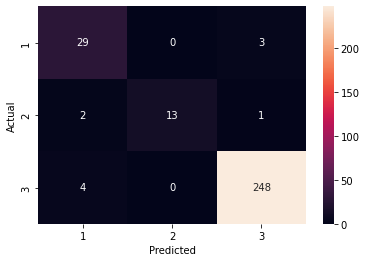

None

In [261]:
""" mostrar matriz de confusion """
display(crearMatriz_confusion(df_comparacion))

#### 4.2 Encontrar métricas

In [262]:
""" encontrar la precision general del modelo"""
print('Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
""" encontrar otras metricas con micro-promedio """
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))
""" encontrar otras metricas con macro-promedio """
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.97

Precision: 0.97
Recall: 0.97
F1-score: 0.97

Precision: 0.94
Recall: 0.90
F1-score: 0.92



**Intepretacion de la matriz y metricas**:<br>
El accuracy del modelo entrenado alcanza un 97%, lo cual quiere decir que la precision de clasificacion es bastante aceptable para determinar si los pacientes tienen, son probables o no tienen diabetes. Ahora para encontrar las otras metricas se ha usado el parametro *average* con dos combinaciones: micropromedio y macropromedio. Esto debido a que no se tiene una salida si no multiclase. <br>
Con micropromedio todas las metricas tienen valor, lo cual quiere decir, que las muestras con las etiquetas multiclase si fueron detectadas casi completamente como positivos. En cambio, con macropromedio se observa que los valores de las metricas precision, recall, y F1 Score se reducieron, porque promedia la suma de cada metrica en la etiqueta de salida.

#### 4.3 Grafica del arbol de decision

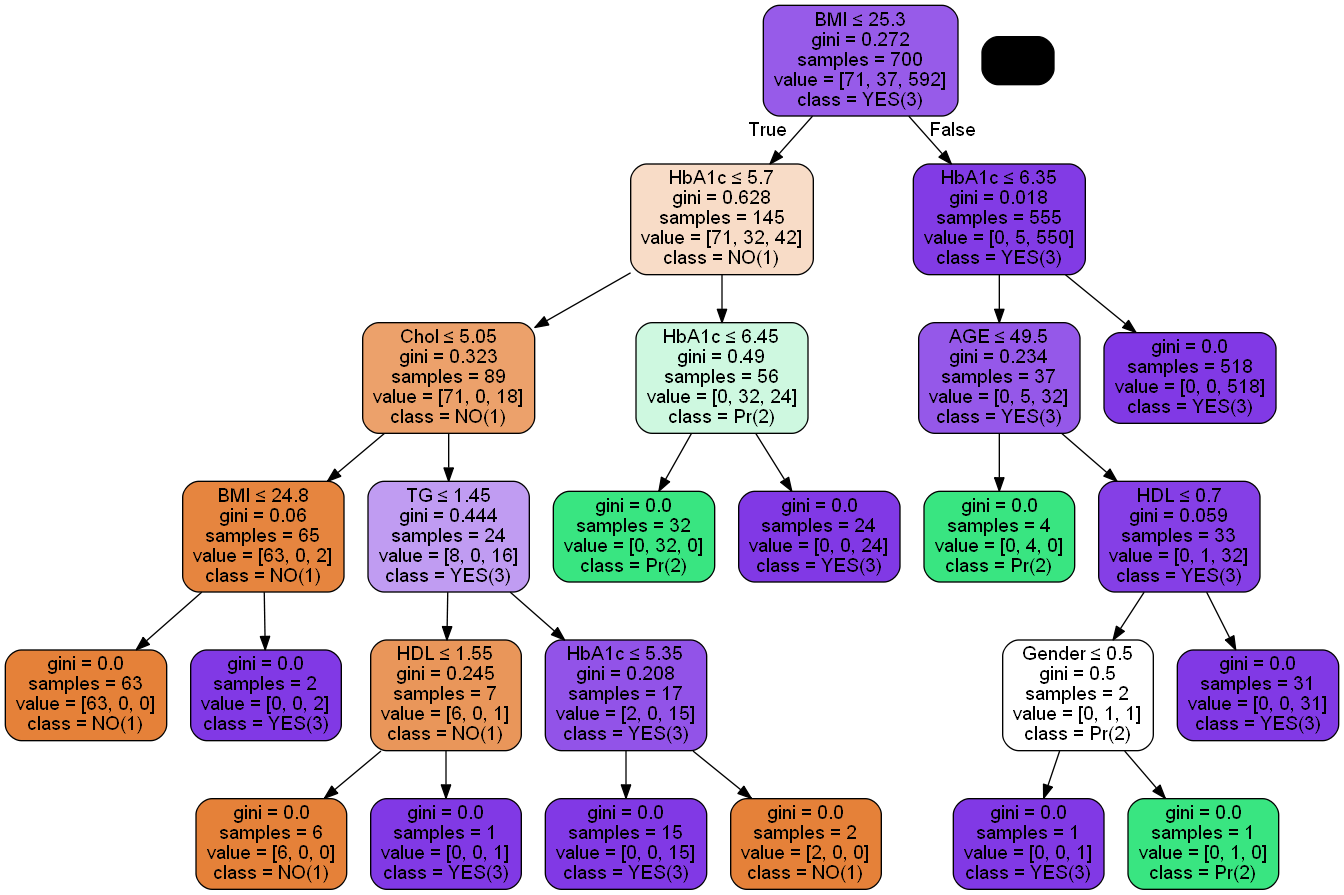

In [268]:
""" objeto de salida de archivos """
dot_data = StringIO()
""" modulo para exportar datos en un grafico """
export_graphviz(clf_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = caracteristicas_x,
                class_names=['NO(1)','Pr(2)','YES(3)'])
""" crear grafico del arbol """
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
"""guardar imagen del arbol """
graph.write_png('diabetes.png')
Image(graph.create_png())

**Intepretacion de la gráfica**:<br>
El nodo principal toma las 700 muestras(samples) que se dividieron para entrenar el modelo, analizando la variable "BMI". Aqui se dividen los datos menores al 25.3% para examinar la etiqueta (class) de tipo Y(3), es decir que si tengan diabetes. El nivel de impureza (gini) de los datos es de 0.27 lo cual es un poco bajo.

El siguiente nivel analiza la variable "HbA1c", donde el nodo de la izquierda tiene un grado de impureza de 0.628 y analiza la etiqueta de los pacientes que NO tienen diabetes. Mientras que el nodo de la derecha analiza la etiquetas de los pacientes que si tengan diabetes. Las muestras se reparten 145 y 555 respectivamente.

El tercer nivel del arbol, en la parte izquierda toma la varaible"Chol" más 89 muestras para analizar pacientes que no tengan diabetes. Mientras que la variable "HbA1c" toma 56 muestras con la etiqueta P(2) para determinar si los pacientes son probables a tener diabetes. Ahora en la parte derecha, se revisa 
la variable "AGE", el cual tiene un nivel de impureza bajo del 0.234 y toma 37 muestras para analizar si estos pacientes de verdad tienen diabetes. Mientras que el nodo de la derecha ya ha determinado que 518 muestras tienen diabetes.

En el cuarto nivel, el primer nodo toma nuevamente la variable "BMI" y toma 65 muestras para determinar que NO tienen diabetes. El siguiente nodo toma la variable "TG" con 24 muestras para determinar si estos tienen diabetes. Los dos nodos del medio están completamente limpios y determina que 32 muestras son del tipo P(2), es decir, tienen una probabilidad de tener diabetes y 24 pacientes si tienen diabetes al tener la etiqueta Y(3).

El mismo procedimiento se analiza en el quinto nivel del arbol de desicion, donde se puede observar que los niveles de impureza y muestras se van reduciendo. Solo se estudian aquellas que requieren un análisis profundo. Y el ultimo nivel, se observa que un paciente es probable a tener diabetes.

Para finalizar, se suma las muestras de los nodos que tienen un nivel de impureza 0.0
tanto para la etiqueta Y(3), N(1) y P(2) y la suma entre ellos debe dar 700. En este caso, se 
suma las muestras de los nodos hojas que determinan la etiqueta P(2), lo cual 
seria 32 + 4 +1 = 37.

In [300]:
""" comprobar suma de la muestras clasificadas del arbol """
y_train.value_counts()

3    592
1     71
2     37
Name: CLASS, dtype: int64